In [1]:
import numpy as np 
from numpy.random import rand
import matplotlib.pyplot as plt

#Parameters
ctrc = 0.005                    # Transcription Constant. 0.005 mRNA/s
ctrd = 0.167                    # Translation Constant. 0.167 Proteins/s
c_assoc = 0.00001               # Association Constant. 0.00001 Associations/s
cmloss = np.log(2)/150          # Degradation Constant depending on mRNA lifetime  150s
cploss = np.log(2)/3600         # Degradation Constant depending on Protein lifetime  1800s
c_diss = 0.005                  # Complex Degradation Constant 0.005/s


ss_mrna = ctrc/cmloss
ss_prot = ctrd*ss_mrna/cploss

#Initial Values
tautime = 0
tauarr = []
reference_time = 0
sampling_time = 100
counter = 1
tmax = 180000
#Species
mRNA = 0
Protein = 0
DNA = 1    
DNA_Protein_complex = 0   

#Outputsave
parr = [0]
rnarr = [0]
carr = [0]
tarr = [0]
a_j = [0 for i in range(6)]

#counter

while tautime < tmax:
    #Propensities
    a_j[0] = ctrc * DNA
    a_j[1] = ctrd * mRNA
    a_j[2] = cmloss * mRNA
    a_j[3] = cploss * Protein
    a_j[4] = c_assoc * Protein * DNA
    a_j[5] = c_diss * DNA_Protein_complex

    #a total
    a_total = np.sum(a_j)

    #Tau
    tau = (1/a_total)*np.log(1/rand())

    #q
    dart = a_total * rand()
    sum_a = 0
    q = 0
    
    if tautime + tau > reference_time:
        tautime = reference_time
        rnarr.append(mRNA)
        parr.append(Protein)
        tarr.append(tautime)
        tauarr.append(tau)
        carr.append(DNA_Protein_complex)
        reference_time += sampling_time

    else:

        for i in range(len(a_j)):
            sum_a += a_j[i]
            if sum_a > dart:
                q = i + 1
                break

        if q == 1:
            # Transcription
            mRNA += 1

        elif q == 2:
            # Translation
            Protein += 1

        elif q == 3:
            # mRNA degradation
            mRNA -= 1

        elif q == 4:
            # Protein degradation
            Protein -= 1

        elif q == 5:
            # DNA-Protein complex association
            Protein -= 1
            DNA -= 1
            DNA_Protein_complex += 1

        elif q == 6:
            # DNA-Protein complex dissociation
            Protein += 1
            DNA += 1
            DNA_Protein_complex -= 1

        tautime += tau


print(f'Steady State mRNA: {ss_mrna}')
print(f'Steady State Protein: {ss_prot}')


Steady State mRNA: 1.0820212806667227
Steady State Protein: 938.4892735354288


In [2]:
np.log(2)/30

0.023104906018664842

(0.0, 1069.95)

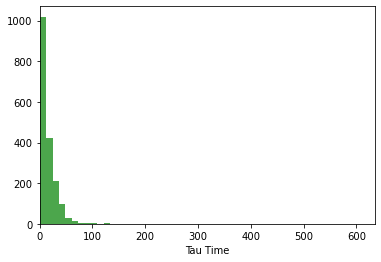

In [3]:
plt.hist(tauarr, bins=50, color='green', alpha=0.7);
plt.xlabel('Tau Time')
plt.xlim(0)
plt.ylim(0)

Text(0.5, 1.0, 'mRNA vs Protein')

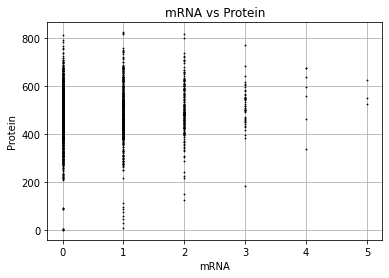

In [4]:
plt.plot(rnarr,parr,'ko',ms=0.8)
plt.grid()
plt.xlabel('mRNA')
plt.ylabel('Protein')
plt.title('mRNA vs Protein')

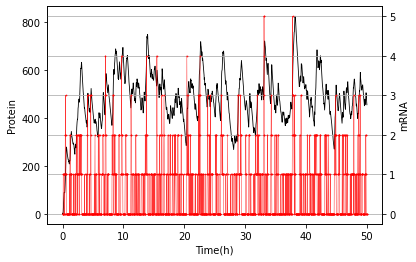

In [5]:
fig, ax1 = plt.subplots()

t = np.array(tarr)
ax2 = ax1.twinx()
ax1.plot(t/3600,parr, color='black', linewidth=0.8)
ax2.plot(t/3600,rnarr,'r-o', alpha=0.8, linewidth=0.5, ms=0.8)

ax1.set_xlabel('Time(h)')
ax1.set_ylabel('Protein')
ax2.set_ylabel('mRNA')
ax2.grid()
#plt.xlim(0,2)
#plt.ylim(0)

Text(0, 0.5, 'DNA-Protein Complex')

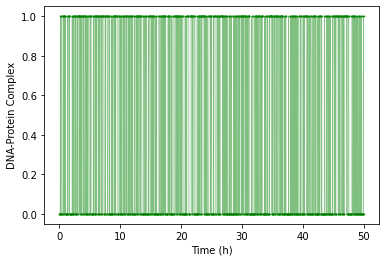

In [6]:
plt.plot(t/3600,carr, 'g-o', alpha=0.5, ms=1, linewidth=0.5)
plt.xlabel('Time (h)')
plt.ylabel('DNA-Protein Complex')
#plt.xlim(0,2)
#plt.ylim(0)

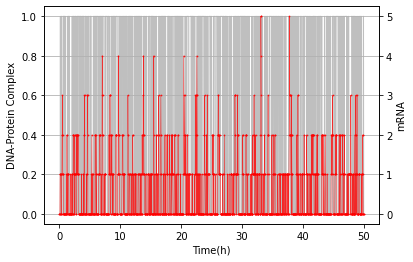

In [7]:
fig, ax3 = plt.subplots()

ax4 = ax3.twinx()
ax3.plot(t/3600,carr, color='grey', linewidth=0.8, alpha=0.5)
ax4.plot(t/3600,rnarr,'r-o', alpha=0.8, linewidth=0.5, ms=0.8)

ax3.set_xlabel('Time(h)')
ax3.set_ylabel('DNA-Protein Complex')
ax4.set_ylabel('mRNA')
ax4.grid()
#plt.xlim(0,1)
#plt.ylim(0)